In [1]:
import torch
import torchvision
import torchmetrics
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import numpy as np
import matplotlib.pyplot as plt
import PIL
from collections import Counter

In [8]:
transform = transforms.Compose([transforms.ToTensor()])
train_set = FashionMNIST('./data', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=25, shuffle=False)
classes = list(train_set.classes)
dataiter = iter(trainloader)
images, labels = next(dataiter)

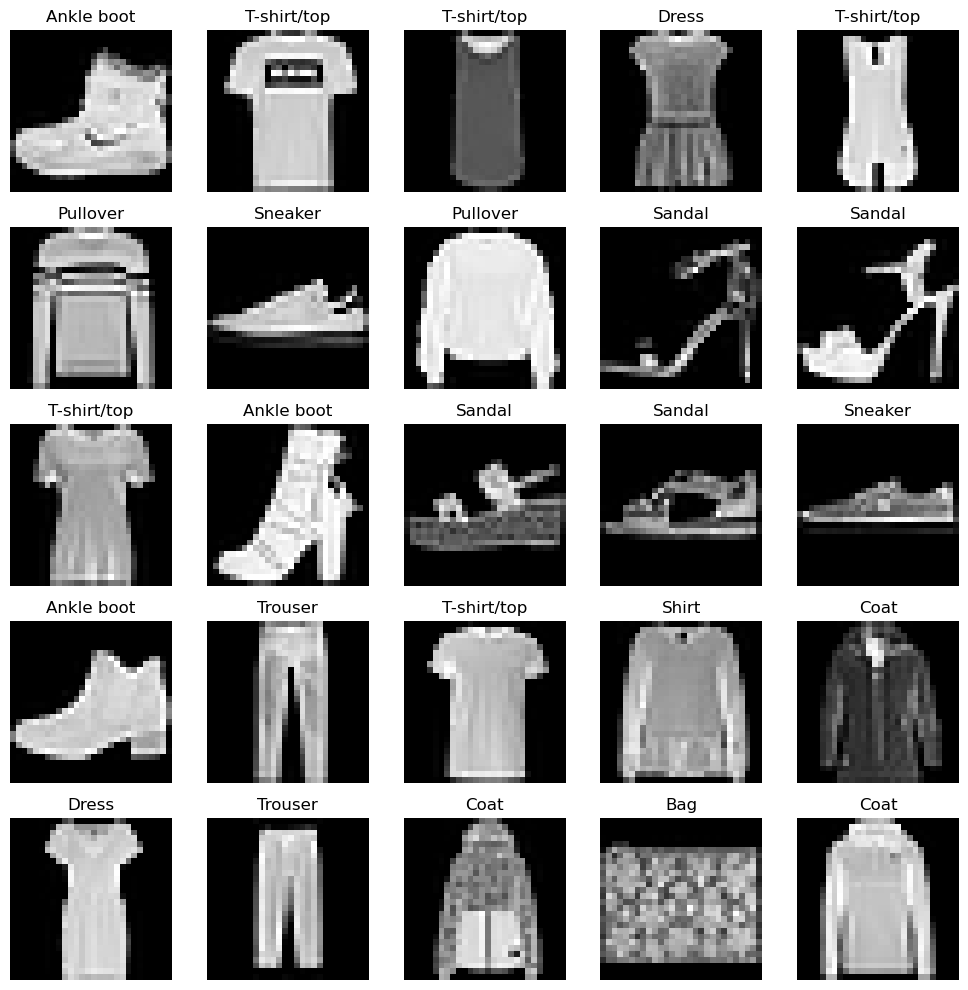

In [3]:
def imshow(img):
    # Unormalize the image
    img = img / 2 + 0.5
    # Convert from tensor
    plt.imshow(img.permute(1, 2, 0))

fig, axes = plt.subplots(figsize=(10, 10), nrows=5, ncols=5)
axes = axes.flatten()
for i in range(25):
    ax = axes[i]
    image = images[i]
    label = labels[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(classes[label])
    ax.axis('off')

plt.tight_layout()
plt.show()

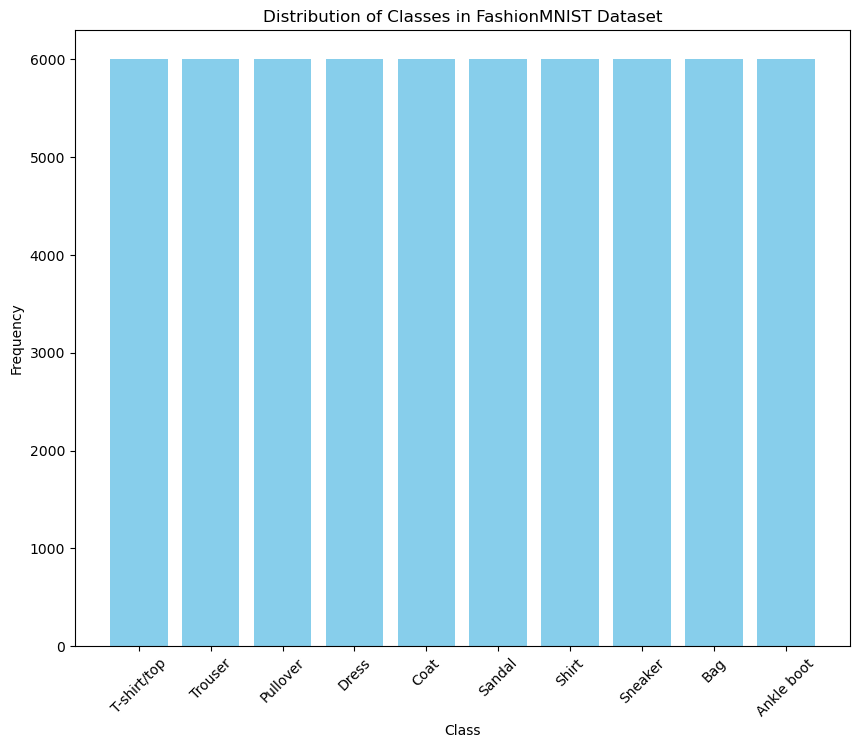

In [10]:
labels = train_set.targets.numpy()
label_counts = Counter(labels)
sorted_counts = [label_counts[i] for i in range(len(classes))]
plt.figure(figsize=(10, 8))
plt.bar(classes, sorted_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in FashionMNIST Dataset')
plt.xticks(rotation=45)
plt.show()